# PREDIKSI STATUS HARA MIKRO PADA TANAMAN SAWIT

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
arjuna_df = pd.read_csv("Arjuna Ca dan B_Oktober_Removed some features.csv")
col_names = arjuna_df.columns
col_names

arjuna_df.columns = ['longitude', 'lattitude','Ca','B','Band 1', 'Band 2', 'Band 3',
              'Band 4', 'Band 5', 'Band 6',
              'Band 7', 'Band 8', 'Band 8A',
              'Band 11', 'Band 12']
arjuna_df.head()

,longitude,lattitude,Ca,B,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12
0,113.43216,-2.17326,1.58,9.42,0.03775,0.0339,0.0516,0.0321,0.07855,0.23990,0.28456,0.2700,0.30602,0.14149,0.06023
1,113.43143,-2.17543,0.81,8.64,0.03369,0.0325,0.0496,0.0263,0.07609,0.20327,0.23495,0.2664,0.26280,0.12009,0.04626
2,113.43376,-2.17543,0.91,24.31,0.03791,0.0358,0.0608,0.0364,0.09442,0.28913,0.34348,0.3124,0.37978,0.16579,0.07532
3,113.43224,-2.23324,0.43,8.87,0.07397,0.0440,0.0825,0.0537,0.13608,0.29288,0.32946,0.3373,0.37849,0.20028,0.09114
4,113.42974,-2.22820,0.13,10.23,0.04904,0.0488,0.0719,0.0426,0.12116,0.35144,0.40782,0.4116,0.44408,0.21421,0.10487


In [21]:
arjuna_df['Ca_ppm'] = arjuna_df['Ca'] * 10000
arjuna_df.head(25)

,longitude,lattitude,Ca,B,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12,Ca_ppm
0,113.43216,-2.17326,1.58,9.42,0.03775,0.0339,0.0516,0.0321,0.07855,0.23990,0.28456,0.2700,0.30602,0.14149,0.06023,15800.0
1,113.43143,-2.17543,0.81,8.64,0.03369,0.0325,0.0496,0.0263,0.07609,0.20327,0.23495,0.2664,0.26280,0.12009,0.04626,8100.0
2,113.43376,-2.17543,0.91,24.31,0.03791,0.0358,0.0608,0.0364,0.09442,0.28913,0.34348,0.3124,0.37978,0.16579,0.07532,9100.0
3,113.43224,-2.23324,0.43,8.87,0.07397,0.0440,0.0825,0.0537,0.13608,0.29288,0.32946,0.3373,0.37849,0.20028,0.09114,4300.0
4,113.42974,-2.22820,0.13,10.23,0.04904,0.0488,0.0719,0.0426,0.12116,0.35144,0.40782,0.4116,0.44408,0.21421,0.10487,1300.0
5,113.42973,-2.23326,0.20,6.75,0.06816,0.0465,0.0767,0.0508,0.12619,0.31779,0.36969,0.3720,0.41610,0.20802,0.10006,2000.0
6,113.42594,-2.22821,0.37,4.96,0.04054,0.0433,0.0796,0.0405,0.12609,0.38430,0.45349,0.4628,0.49747,0.20106,0.08456,3700.0
7,113.42634,-2.22819,0.74,8.05,0.03552,0.0410,0.0754,0.0378,0.11985,0.35953,0.42257,0.4332,0.46421,0.17827,0.07426,7400.0
8,113.41862,-2.22825,0.30,15.64,0.02386,0.0312,0.0558,0.0299,0.08670,0.24894,0.28841,0.3144,0.30017,0.13277,0.05408,3000.0
9,113.42332,-2.25169,0.33,5.82,0.09859,0.0575,0.0914,0.0636,0.14294,0.34366,0.39415,0.3848,0.43586,0.24149,0.12442,3300.0


In [22]:
arjuna_df.describe()

,longitude,lattitude,Ca,B,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12,Ca_ppm
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,113.404547,-2.283387,0.534947,11.758842,0.035192,0.034460,0.066077,0.038283,0.114529,0.306574,0.362171,0.358612,0.401839,0.201634,0.090542,5349.473684
std,0.010373,0.037667,0.372321,5.037628,0.010522,0.006098,0.008680,0.008124,0.013832,0.031679,0.037798,0.038304,0.041911,0.023236,0.013678,3723.212799
min,113.381540,-2.333750,0.050000,4.960000,0.023860,0.025000,0.042900,0.022700,0.076090,0.203270,0.234950,0.234400,0.262800,0.120090,0.046260,500.000000
25%,113.398710,-2.321715,0.230000,7.620000,0.030070,0.031200,0.060800,0.033950,0.106595,0.291845,0.344525,0.339600,0.381115,0.191745,0.083500,2300.000000
50%,113.403790,-2.278950,0.400000,10.770000,0.031990,0.032700,0.065500,0.037400,0.115210,0.309200,0.363300,0.358400,0.402460,0.207240,0.092940,4000.000000
75%,113.407215,-2.251790,0.810000,14.720000,0.036290,0.035650,0.069550,0.040450,0.122710,0.325600,0.385215,0.381400,0.426450,0.217400,0.099075,8100.000000
max,113.433760,-2.173260,1.580000,27.460000,0.098590,0.057500,0.093900,0.068300,0.156300,0.385810,0.453490,0.462800,0.497470,0.242350,0.124420,15800.000000


In [23]:
#Hitung indeks vegetasi
arjuna_df['NDVI'] = (arjuna_df['Band 8'] - arjuna_df['Band 4']) / (arjuna_df['Band 8'] + arjuna_df['Band 4'])
# Hitung SAVI (Soil-Adjusted Vegetation Index)
L = 0.5
arjuna_df['SAVI'] = ((arjuna_df['Band 8'] - arjuna_df['Band 4']) / (arjuna_df['Band 8'] + arjuna_df['Band 4'] + L)) * (1 + L)
# Hitung MSAVI (Modified Soil-Adjusted Vegetation Index)
arjuna_df['MSAVI'] = 0.5 * ((2 * arjuna_df['Band 8A'] + 1) - 
                             ((2 * arjuna_df['Band 8A'] + 1)**2 - 
                              8 * (arjuna_df['Band 8A'] - arjuna_df['Band 5']))**0.5)

# Hitung EVI (Enhanced Vegetation Index)
arjuna_df['EVI'] = 2.5 * ((arjuna_df['Band 8A'] - arjuna_df['Band 5']) / 
                        (arjuna_df['Band 8A'] + 6 * arjuna_df['Band 5'] - 7.5* arjuna_df['Band 1'] + 1))
# Hitung EVI2 (Enhanced Vegetation Index 2)
arjuna_df['EVI2'] = 2.4 * ((arjuna_df['Band 8A'] - arjuna_df['Band 5']) / 
                           (arjuna_df['Band 8A'] + 2.4 * arjuna_df['Band 5'] + 1))
arjuna_df['GSAVI'] = ((arjuna_df['Band 8A']- arjuna_df['Band 3']/ arjuna_df['Band 8A'] + arjuna_df['Band 3'] + 0.5 )) * (1 + 0.5)

arjuna_df.head()

,longitude,lattitude,Ca,B,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,...,Band 8A,Band 11,Band 12,Ca_ppm,NDVI,SAVI,MSAVI,EVI,EVI2,GSAVI
0,113.43216,-2.17326,1.58,9.42,0.03775,0.0339,0.0516,0.0321,0.07855,0.23990,...,0.30602,0.14149,0.06023,15800.0,0.787488,0.444895,0.364740,0.380590,0.365282,1.033505
1,113.43143,-2.17543,0.81,8.64,0.03369,0.0325,0.0496,0.0263,0.07609,0.20327,...,0.26280,0.12009,0.04626,8100.0,0.820294,0.454333,0.306243,0.318256,0.310017,0.935495
2,113.43376,-2.17543,0.91,24.31,0.03791,0.0358,0.0608,0.0364,0.09442,0.28913,...,0.37978,0.16579,0.07532,9100.0,0.791284,0.487747,0.428900,0.429248,0.426338,1.170731
3,113.43224,-2.23324,0.43,8.87,0.07397,0.0440,0.0825,0.0537,0.13608,0.29288,...,0.37849,0.20028,0.09114,4300.0,0.725320,0.477441,0.342836,0.369484,0.341206,1.114528
4,113.42974,-2.22820,0.13,10.23,0.04904,0.0488,0.0719,0.0426,0.12116,0.35144,...,0.44408,0.21421,0.10487,1300.0,0.812417,0.580067,0.448654,0.447694,0.446726,1.281108


In [24]:
arjuna_df.shape

(95, 22)

In [25]:
import pandas as pd
import numpy as np

# Simpan DataFrame asli untuk perbandingan
original_df = arjuna_df.copy()

# Kolom yang akan diproses
columns_to_process = arjuna_df.columns.tolist()

# Fungsi untuk menghitung outlier menggunakan metode IQR
def count_outliers_iqr(df, columns):
    outlier_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.15)
        Q3 = df[col].quantile(0.85)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outliers = (df[col] < lower_limit) | (df[col] > upper_limit)
        outlier_count[col] = outliers.sum()
    return outlier_count

# Hitung jumlah outlier sebelum dihapus
initial_outliers = count_outliers_iqr(arjuna_df, columns_to_process)
print("Jumlah outlier sebelum dihapus:", initial_outliers)

# Hapus outlier dari DataFrame menggunakan metode IQR
for col in columns_to_process:
    Q1 = arjuna_df[col].quantile(0.15)
    Q3 = arjuna_df[col].quantile(0.85)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    arjuna_df = arjuna_df[(arjuna_df[col] >= lower_limit) & (arjuna_df[col] <= upper_limit)]

# Hitung jumlah baris setelah outlier dihapus
num_rows_after = arjuna_df.shape[0]
print(f"Jumlah baris setelah menghapus pencilan: {num_rows_after}")

# Hitung jumlah outlier yang dihapus
final_outliers = count_outliers_iqr(original_df, columns_to_process)
for col in final_outliers:
    final_outliers[col] -= count_outliers_iqr(arjuna_df, [col])[col]

print("Jumlah outlier yang dihapus per kolom:", final_outliers)

# Tampilkan DataFrame setelah proses penghapusan outlier
print(arjuna_df.head())


Jumlah outlier sebelum dihapus: {'longitude': 3, 'lattitude': 0, 'Ca': 0, 'B': 0, 'Band 1': 4, 'Band 2': 0, 'Band 3': 0, 'Band 4': 3, 'Band 5': 0, 'Band 6': 0, 'Band 7': 0, 'Band 8': 1, 'Band 8A': 0, 'Band 11': 0, 'Band 12': 0, 'Ca_ppm': 0, 'NDVI': 3, 'SAVI': 0, 'MSAVI': 0, 'EVI': 0, 'EVI2': 0, 'GSAVI': 1}
Jumlah baris setelah menghapus pencilan: 84
Jumlah outlier yang dihapus per kolom: {'longitude': 0, 'lattitude': 0, 'Ca': 0, 'B': 0, 'Band 1': 2, 'Band 2': -2, 'Band 3': 0, 'Band 4': 3, 'Band 5': 0, 'Band 6': 0, 'Band 7': 0, 'Band 8': 1, 'Band 8A': 0, 'Band 11': 0, 'Band 12': 0, 'Ca_ppm': 0, 'NDVI': 2, 'SAVI': 0, 'MSAVI': 0, 'EVI': 0, 'EVI2': 0, 'GSAVI': 1}
    longitude  lattitude    Ca      B   Band 1  Band 2  Band 3  Band 4  \
4   113.42974   -2.22820  0.13  10.23  0.04904  0.0488  0.0719  0.0426   
6   113.42594   -2.22821  0.37   4.96  0.04054  0.0433  0.0796  0.0405   
7   113.42634   -2.22819  0.74   8.05  0.03552  0.0410  0.0754  0.0378   
8   113.41862   -2.22825  0.30  15.6

In [ ]:
import pandas as pd
import numpy as np

# Simpan DataFrame asli untuk perbandingan
original_df = arjuna_df.copy()

# Kolom yang akan diproses
columns_to_process = arjuna_df.columns.tolist()

# Fungsi untuk menghitung outlier
def count_outliers(df, columns):
    outlier_count = {}
    for col in columns:
        upper_limit = df[col].mean() + 3 * df[col].std()
        lower_limit = df[col].mean() - 3 * df[col].std()
        outliers = (df[col] > upper_limit) | (df[col] < lower_limit)
        outlier_count[col] = outliers.sum()
    return outlier_count

# Hitung jumlah outlier sebelum dihapus
initial_outliers = count_outliers(arjuna_df, columns_to_process)
print("Jumlah outlier sebelum dihapus:", initial_outliers)

# Hapus outlier dari DataFrame
for col in columns_to_process:
    upper_limit = arjuna_df[col].mean() + 3 * arjuna_df[col].std()
    lower_limit = arjuna_df[col].mean() - 3 * arjuna_df[col].std()
    arjuna_df = arjuna_df[(arjuna_df[col] <= upper_limit) & (arjuna_df[col] >= lower_limit)]

# Hitung jumlah baris setelah outlier dihapus
num_rows_after = arjuna_df.shape[0]
print(f"Jumlah baris setelah menghapus pencilan: {num_rows_after}")

# Hitung jumlah outlier yang dihapus
final_outliers = count_outliers(original_df, columns_to_process)
for col in final_outliers:
    final_outliers[col] -= count_outliers(arjuna_df, [col])[col]

print("Jumlah outlier yang dihapus per kolom:", final_outliers)

# Tampilkan DataFrame setelah proses penghapusan outlier
print(arjuna_df.head())


In [26]:
missing_values = arjuna_df.isnull().sum()
print("Jumlah missing values per kolom:", missing_values)

Jumlah missing values per kolom: longitude    0
lattitude    0
Ca           0
B            0
Band 1       0
Band 2       0
Band 3       0
Band 4       0
Band 5       0
Band 6       0
Band 7       0
Band 8       0
Band 8A      0
Band 11      0
Band 12      0
Ca_ppm       0
NDVI         0
SAVI         0
MSAVI        0
EVI          0
EVI2         0
GSAVI        0
dtype: int64


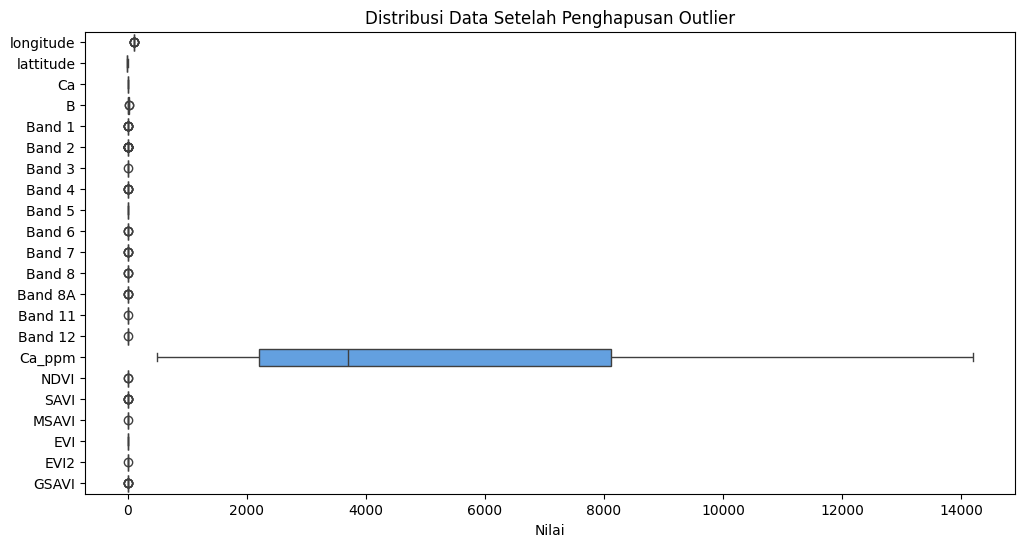

In [27]:
# Visualisasi distribusi data setelah outlier dihapus
plt.figure(figsize=(12, 6))
sns.boxplot(data=arjuna_df, orient='h')
plt.title('Distribusi Data Setelah Penghapusan Outlier')
plt.xlabel('Nilai')
plt.show()

In [28]:
arjuna_df.shape

(84, 22)

In [29]:
arjuna_df.head()

,longitude,lattitude,Ca,B,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,...,Band 8A,Band 11,Band 12,Ca_ppm,NDVI,SAVI,MSAVI,EVI,EVI2,GSAVI
4,113.42974,-2.22820,0.13,10.23,0.04904,0.0488,0.0719,0.0426,0.12116,0.35144,...,0.44408,0.21421,0.10487,1300.0,0.812417,0.580067,0.448654,0.447694,0.446726,1.281108
6,113.42594,-2.22821,0.37,4.96,0.04054,0.0433,0.0796,0.0405,0.12609,0.38430,...,0.49747,0.20106,0.08456,3700.0,0.839062,0.631366,0.495288,0.476138,0.495150,1.375591
7,113.42634,-2.22819,0.74,8.05,0.03552,0.0410,0.0754,0.0378,0.11985,0.35953,...,0.46421,0.17827,0.07426,7400.0,0.839490,0.610814,0.473312,0.449108,0.471766,1.315775
8,113.41862,-2.22825,0.30,15.64,0.02386,0.0312,0.0558,0.0299,0.08670,0.24894,...,0.30017,0.13277,0.05408,3000.0,0.826314,0.505448,0.338291,0.325130,0.339684,1.005113
10,113.42423,-2.25168,0.82,11.25,0.04782,0.0487,0.0746,0.0475,0.12345,0.32306,...,0.41777,0.20357,0.09845,8200.0,0.773107,0.528519,0.414122,0.408819,0.412105,1.220704


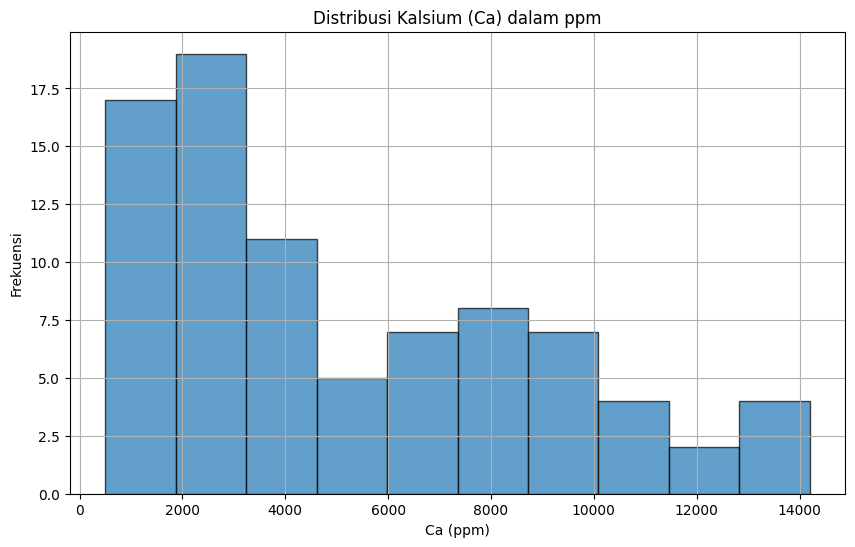

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(arjuna_df['Ca_ppm'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribusi Kalsium (Ca) dalam ppm')
plt.xlabel('Ca (ppm)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

0.17885182894396426


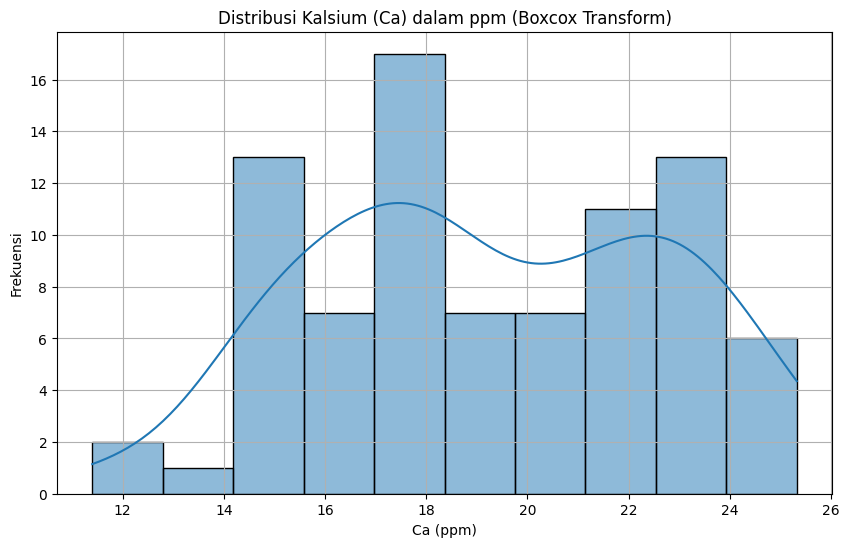

In [31]:
import scipy.stats as stats
# transformasi box-cox
arjuna_df['Ca_ppm_boxcox'], nilai_lambda = stats.boxcox(arjuna_df['Ca_ppm'])
print(nilai_lambda)

# Membuat histogram dari data yang telah ditransformasi logaritma
plt.figure(figsize=(10, 6))
sns.histplot(arjuna_df['Ca_ppm_boxcox'], bins=10, kde=True)
plt.title('Distribusi Kalsium (Ca) dalam ppm (Boxcox Transform)')
plt.xlabel('Ca (ppm)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [32]:
arjuna_df.head()

,longitude,lattitude,Ca,B,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,...,Band 11,Band 12,Ca_ppm,NDVI,SAVI,MSAVI,EVI,EVI2,GSAVI,Ca_ppm_boxcox
4,113.42974,-2.22820,0.13,10.23,0.04904,0.0488,0.0719,0.0426,0.12116,0.35144,...,0.21421,0.10487,1300.0,0.812417,0.580067,0.448654,0.447694,0.446726,1.281108,14.566484
6,113.42594,-2.22821,0.37,4.96,0.04054,0.0433,0.0796,0.0405,0.12609,0.38430,...,0.20106,0.08456,3700.0,0.839062,0.631366,0.495288,0.476138,0.495150,1.375591,18.713242
7,113.42634,-2.22819,0.74,8.05,0.03552,0.0410,0.0754,0.0378,0.11985,0.35953,...,0.17827,0.07426,7400.0,0.839490,0.610814,0.473312,0.449108,0.471766,1.315775,21.921009
8,113.41862,-2.22825,0.30,15.64,0.02386,0.0312,0.0558,0.0299,0.08670,0.24894,...,0.13277,0.05408,3000.0,0.826314,0.505448,0.338291,0.325130,0.339684,1.005113,17.818494
10,113.42423,-2.25168,0.82,11.25,0.04782,0.0487,0.0746,0.0475,0.12345,0.32306,...,0.20357,0.09845,8200.0,0.773107,0.528519,0.414122,0.408819,0.412105,1.220704,22.430796


In [33]:
from sklearn.preprocessing import MinMaxScaler
# Normalisasi data dengan MinMaxScaler
# Pisahkan variabel independen dan variabel dependen
#X = arjuna_df.drop[['NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']]
X = arjuna_df[['Band 1', 'Band 2', 'Band 3',
              'Band 4', 'Band 5', 'Band 6',
              'Band 7', 'Band 8', 'Band 8A',
              'Band 11', 'Band 12','NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']]
y = arjuna_df[['Ca','B','Ca_ppm','Ca_ppm_boxcox']]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi variabel independen
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# Tampilkan DataFrame hasil normalisasi
print(X_scaled_df)

      Band 1    Band 2    Band 3    Band 4    Band 5    Band 6    Band 7  \
0   0.922344  1.000000  0.616564  0.646104  0.673837  0.785683  0.750846   
1   0.610989  0.765957  0.852761  0.577922  0.770239  0.990584  1.000000   
2   0.427106  0.668085  0.723926  0.490260  0.648221  0.836129  0.831315   
3   0.000000  0.251064  0.122699  0.233766  0.000000  0.146536  0.099400   
4   0.877656  0.995745  0.699387  0.805195  0.718616  0.608717  0.623077   
..       ...       ...       ...       ...       ...       ...       ...   
79  0.189011  0.131915  0.346626  0.480519  0.518968  0.542932  0.519040   
80  0.169597  0.221277  0.349693  0.509740  0.612436  0.428322  0.421877   
81  0.252015  0.234043  0.472393  0.574675  0.718029  0.477521  0.440753   
82  0.218681  0.251064  0.374233  0.610390  0.564138  0.348631  0.334915   
83  0.189011  0.191489  0.242331  0.487013  0.466562  0.305107  0.299945   

      Band 8   Band 8A   Band 11   Band 12      NDVI      SAVI     MSAVI  \
0   0.74803

In [34]:
X_scaled_df.head(10)

,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12,NDVI,SAVI,MSAVI,EVI,EVI2,GSAVI
0,0.922344,1.000000,0.616564,0.646104,0.673837,0.785683,0.750846,0.748031,0.729397,0.754983,0.802116,0.554136,0.730612,0.736520,0.827596,0.726173,0.742785
1,0.610989,0.765957,0.852761,0.577922,0.770239,0.990584,1.000000,1.000000,1.000000,0.633077,0.481364,0.711462,0.992864,1.000000,1.000000,1.000000,0.997065
2,0.427106,0.668085,0.723926,0.490260,0.648221,0.836129,0.831315,0.854331,0.831424,0.421804,0.318699,0.713991,0.887794,0.875835,0.836167,0.867773,0.836084
3,0.000000,0.251064,0.122699,0.233766,0.000000,0.146536,0.099400,0.269685,0.000000,0.000000,0.000000,0.636191,0.349146,0.112983,0.084711,0.120877,0.000000
4,0.877656,0.995745,0.699387,0.805195,0.718616,0.608717,0.623077,0.549213,0.596047,0.656346,0.700726,0.322025,0.467086,0.541416,0.591964,0.530400,0.580220
5,1.000000,0.761702,0.861963,0.928571,0.844349,0.766228,0.784288,0.759350,0.820933,0.909706,0.935407,0.359475,0.645970,0.750166,0.824202,0.742109,0.803648
6,0.404762,0.404255,0.420245,0.392857,0.509973,0.760242,0.835734,0.775591,0.840243,0.808844,0.711939,0.752531,0.845401,0.968988,0.959402,0.960015,0.891364
7,0.535897,0.314894,0.398773,0.366883,0.359797,0.629981,0.605237,0.594488,0.614445,0.370539,0.378395,0.692834,0.670157,0.779356,0.832133,0.764901,0.655404
8,0.248352,0.361702,0.355828,0.376623,0.455025,0.592692,0.667321,0.604331,0.630867,0.463706,0.317909,0.689680,0.677089,0.742127,0.684959,0.729125,0.680878
9,0.286813,0.217021,0.478528,0.386364,0.567266,0.710357,0.781015,0.661417,0.771718,0.758042,0.616393,0.708403,0.733088,0.851600,0.786782,0.841328,0.810543


# PREDIKSI NUTRISI DENGAN SVR

## PREDIKSI KALSiIUM (CA)

In [151]:
X_scaled_df= arjuna_df[['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7','Band 8','Band 8A','Band 11','Band 12','NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']]
#X= arjuna_df[['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7','Band 8','Band 8A','Band 11','Band 12','NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']]
y = arjuna_df['Ca_ppm_boxcox']

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.1, random_state=42)

In [152]:
from sklearn.svm import SVR
import sklearn.metrics as sm
model = SVR()
model.fit(X_train, y_train)

SVR()

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluasi performa
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test,y_pred_test) * 100
mape_train = mean_absolute_percentage_error(y_train,y_pred_train) * 100
print(f'Mean Squared Error tes: {mse_test}')
print(f'mape tes: {mape_test}')
print(f'mape train: {mape_train}')

Mean Squared Error tes: 10.982079298392923
mape tes: 15.627903452817021
mape train: 15.86896846059177


In [157]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
def evaluate(test_labels, pred_labels):
    errors = abs(pred_labels - test_labels)
    mape = 100* np.mean(errors/test_labels)
    accuracy = 100 - mape
    rmse = root_mean_squared_error(test_labels, pred_labels)
    mse = mean_squared_error(test_labels, pred_labels)
    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f}'.format(mse))
    return accuracy

accuracy = evaluate(y_test,y_pred_test)

Model Performance
Average error : 3.0339 %
Accuracy : 84.37 %
RMSE: 3.31 %
MSE: 10.98


In [159]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid yang akan dijelajahi
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parameter regularisasi
    'gamma': ['scale', 'auto', 0.1, 1],  # Parameter kernel
    'epsilon': [0.1, 0.01, 0.001, 0.0001],  # Parameter epsilon
    'kernel' : ['linear', 'poly', 'sigmoid','rbf']
}
# Inisialisasi model SVR
model = SVR()

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

# Lakukan pencarian grid pada data pelatihan
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Prediksi menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Evaluasi performa model dengan parameter terbaik
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100
mape_train = mean_absolute_percentage_error(y_train,y_pred_train) * 100
print(f'Mean Squared Error tes: {mse_test}')
print(f'MAPE tes: {mape_test}')
print(f'MAPE tes: {mape_train}')

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Parameter terbaik: {'C': 100, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'sigmoid'}
Mean Squared Error tes: 11.008155278367404
MAPE tes: 15.721582444684834
MAPE tes: 15.86896846059177


In [96]:
import pandas as pd
df1 = pd.DataFrame()
df1['nilai aktual'] = y_test
df1['prediksi Ca'] = y_pred_test
df1['selisih'] = df1['prediksi Ca'] - df1['nilai aktual']
print(df1)

    nilai aktual  prediksi Ca   selisih
84     18.220966    18.793756  0.572790
4      14.566484    18.751539  4.185055
68     17.226951    19.053216  1.826265
29     23.647635    18.827941 -4.819694
18     16.371777    18.746388  2.374611
80     16.555276    18.768612  2.213336
16     22.430796    18.749279 -3.681516
25     22.957616    18.785665 -4.171951
10     22.430796    18.801808 -3.628988


In [98]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
def evaluate(test_labels, pred_labels):
    errors = abs(pred_labels - test_labels)
    mape = 100* np.mean(errors/test_labels)
    accuracy = 100 - mape
    rmse = root_mean_squared_error(test_labels, pred_labels)
    mse = mean_squared_error(test_labels, pred_labels)

    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f} '.format(mse))
    return accuracy

accuracy = evaluate(y_test,y_pred_test)

Model Performance
Average error : 3.0527 %
Accuracy : 84.28 %
RMSE: 3.32 %
MSE: 11.01 


In [130]:
import scipy.stats as stats

# Misalkan Anda telah menghitung best_lambda sebelumnya
best_lambda = 0.17885182894396426 # contoh nilai best_lambda

# Lakukan invers transformasi Box-Cox pada prediksi model
# Invers transformasi Box-Cox pada prediksi model
y_pred_test_inverse = (y_pred_test * best_lambda + 1) ** (1 / best_lambda)
y_test_inverse = (y_test * best_lambda + 1) ** (1 / best_lambda)
pred = y_pred_test_inverse / 10000
test = y_test_inverse / 10000
print(pred)
print(test)
diff = pred - test
print(diff)

[0.37690554 0.3732716  0.39988293 0.37986935 0.3728302  0.37473769
 0.3730779  0.37620681 0.37760191]
84    0.33
4     0.13
68    0.26
29    1.04
18    0.21
80    0.22
16    0.82
25    0.91
10    0.82
Name: Ca_ppm_boxcox, dtype: float64
84    0.046906
4     0.243272
68    0.139883
29   -0.660131
18    0.162830
80    0.154738
16   -0.446922
25   -0.533793
10   -0.442398
Name: Ca_ppm_boxcox, dtype: float64


In [100]:
import joblib

# Simpan model SVR yang telah dilatih ke dalam file
joblib.dump(best_model, 'model_svr_kalsium_fixed.pkl')
print("Model telah disimpan di dalam direktori")

Model telah disimpan di dalam direktori


'\n# Simpan prediksi yang telah diinvers ke dalam DataFrame\nresults_df = pd.DataFrame({\'prediksi_inverse\': y_pred_test_inverse, \'test_inverse\': y_test_inverse})\nresults_df.to_csv(\'prediksi_kalsium_inverse.csv\', index=False)\nprint("Prediksi yang diinvers telah disimpan ke dalam file prediksi_kalsium_inverse.csv")\n'

In [ ]:
import pandas as pd
new_data = pd.read_csv('rand_point_coordinate_band citra.csv')
new_data.head()

In [ ]:
new_data.isna().sum()

In [ ]:
new_data.shape

In [ ]:
# Menghapus baris yang memiliki nilai 0 di salah satu kolom
new_data_rev = new_data[(new_data != 0).all(axis=1)]
new_data_rev.shape


In [ ]:
import pandas as pd
import joblib

# 1. Memuat model dari file yang telah disimpan
loaded_model = joblib.load('svr_model_kalsium.pkl')

# 2. Memuat data baru dari file CSV

#Hitung indeks vegetasi
new_data_rev['NDVI'] = (new_data_rev['Band 8'] - new_data_rev['Band 4']) / (new_data_rev['Band 8'] + new_data_rev['Band 4'])
# Hitung SAVI (Soil-Adjusted Vegetation Index)
L = 0.5
new_data_rev['SAVI'] = ((new_data_rev['Band 8'] - new_data_rev['Band 4']) / (new_data_rev['Band 8'] + new_data_rev['Band 4'] + L)) * (1 + L)
# Hitung MSAVI (Modified Soil-Adjusted Vegetation Index)
new_data_rev['MSAVI'] = 0.5 * ((2 * new_data_rev['Band 8A'] + 1) - 
                             ((2 * new_data_rev['Band 8A'] + 1)**2 - 
                              8 * (new_data_rev['Band 8A'] - new_data_rev['Band 5']))**0.5)

# Hitung EVI (Enhanced Vegetation Index)
new_data_rev['EVI'] = 2.5 * ((new_data_rev['Band 8A'] - new_data_rev['Band 5']) / 
                        (new_data_rev['Band 8A'] + 6 * new_data_rev['Band 5'] - 7.5* new_data_rev['Band 1'] + 1))
# Hitung EVI2 (Enhanced Vegetation Index 2)
new_data_rev['EVI2'] = 2.4 * ((new_data_rev['Band 8A'] - new_data_rev['Band 5']) / 
                           (new_data_rev['Band 8A'] + 2.4 * new_data_rev['Band 5'] + 1))
new_data_rev['GSAVI'] = ((new_data_rev['Band 8A']- new_data_rev['Band 3']/ new_data_rev['Band 8A'] + new_data_rev['Band 3'] + 0.5 )) * (1 + 0.5)

# 3. Melakukan prediksi menggunakan model yang dimuat
# Pisahkan fitur dari data baru (pastikan urutan kolom sesuai dengan yang digunakan pada pelatihan)
X_new = new_data_rev[['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 'Band 8', 'Band 8A', 'Band 11', 'Band 12', 'NDVI', 'SAVI', 'MSAVI', 'EVI', 'EVI2', 'GSAVI']]
# Lakukan prediksi
y_pred_new = loaded_model.predict(X_new)

# 4. Menganalisis atau menyimpan hasil prediksi sesuai kebutuhan Anda
# Contoh: Menyimpan hasil prediksi ke dalam file CSV
pred_results = pd.DataFrame({'prediksi': y_pred_new})
pred_results.to_csv('prediksi_data_baru_kalsium.csv', index=False)
print("Prediksi untuk data baru telah disimpan ke dalam file prediksi_data_baru_kalsium.csv")


In [ ]:
import pandas as pd
import scipy.stats as stats

# Misalkan Anda telah menghitung best_lambda sebelumnya
best_lambda = 0.12890870365705573 # contoh nilai best_lambda

data_prediksi = pd.read_csv('prediksi_data_baru_kalsium.csv')
prediksi_df = (data_prediksi * best_lambda + 1) ** (1 / best_lambda)
pred_new = prediksi_df / 10000
# Simpan DataFrame pred_new ke dalam file CSV
pred_new.to_csv('prediksi_data_baru_kalsium_adjusted.csv', index=False)




## PREDIKSI SVR PADA BORON

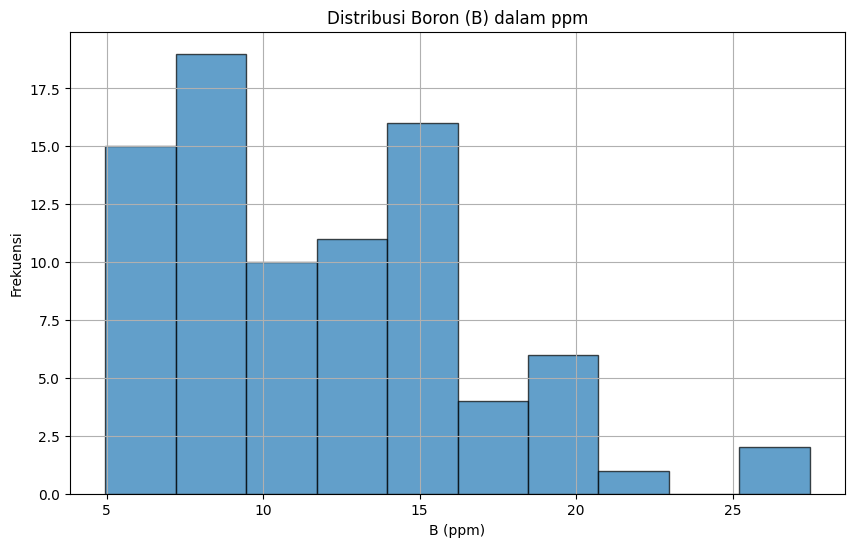

In [167]:
plt.figure(figsize=(10, 6))
plt.hist(arjuna_df['B'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribusi Boron (B) dalam ppm')
plt.xlabel('B (ppm)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

-0.01786592640242531


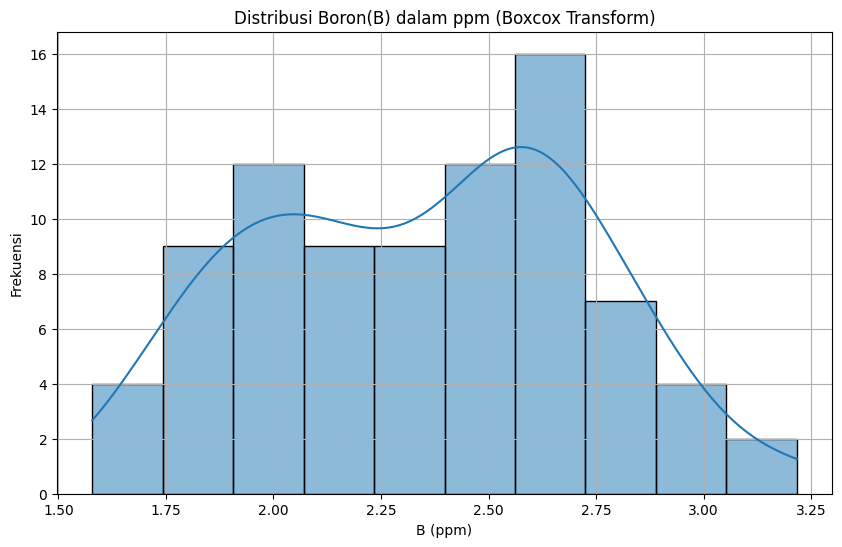

In [166]:
import scipy.stats as stats
# transformasi box-cox
arjuna_df['B_ppm_boxcox'], lambda_value = stats.boxcox(arjuna_df['B'])
print(lambda_value)

# Membuat histogram dari data yang telah ditransformasi logaritma
plt.figure(figsize=(10, 6))
sns.histplot(arjuna_df['B_ppm_boxcox'], bins=10, kde=True)
plt.title('Distribusi Boron(B) dalam ppm (Boxcox Transform)')
plt.xlabel('B (ppm)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [134]:
arjuna_df.head()

,longitude,lattitude,Ca,B,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,...,Band 12,Ca_ppm,NDVI,SAVI,MSAVI,EVI,EVI2,GSAVI,Ca_ppm_boxcox,B_ppm_boxcox
4,113.42974,-2.22820,0.13,10.23,0.04904,0.0488,0.0719,0.0426,0.12116,0.35144,...,0.10487,1300.0,0.812417,0.580067,0.448654,0.447694,0.446726,1.281108,14.566484,2.277685
6,113.42594,-2.22821,0.37,4.96,0.04054,0.0433,0.0796,0.0405,0.12609,0.38430,...,0.08456,3700.0,0.839062,0.631366,0.495288,0.476138,0.495150,1.375591,18.713242,1.578714
7,113.42634,-2.22819,0.74,8.05,0.03552,0.0410,0.0754,0.0378,0.11985,0.35953,...,0.07426,7400.0,0.839490,0.610814,0.473312,0.449108,0.471766,1.315775,21.921009,2.047292
8,113.41862,-2.22825,0.30,15.64,0.02386,0.0312,0.0558,0.0299,0.08670,0.24894,...,0.05408,3000.0,0.826314,0.505448,0.338291,0.325130,0.339684,1.005113,17.818494,2.683377
10,113.42423,-2.25168,0.82,11.25,0.04782,0.0487,0.0746,0.0475,0.12345,0.32306,...,0.09845,8200.0,0.773107,0.528519,0.414122,0.408819,0.412105,1.220704,22.430796,2.368783


In [160]:
X_scaled= arjuna_df[['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7','Band 8','Band 8A','Band 11','Band 12','NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']]
y = arjuna_df['B_ppm_boxcox']

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.1, random_state=42)

In [161]:
from sklearn.svm import SVR
import sklearn.metrics as sm
model = SVR()
model.fit(X_train, y_train)

SVR()

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluasi performa
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test,y_pred_test) * 100
mape_train = mean_absolute_percentage_error(y_train,y_pred_train) * 100
print(f'Mean Squared Error tes: {mse_test}')
print(f'mape tes: {mape_test}')
print(f'mape train: {mape_train}')

Mean Squared Error tes: 0.1512104907104425
mape tes: 13.567532379870478
mape train: 14.313812482692946


In [164]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
def evaluate(test_labels, pred_labels):
    errors = abs(pred_labels - test_labels)
    mape = 100* np.mean(errors/test_labels)
    accuracy = 100 - mape
    rmse = root_mean_squared_error(test_labels, pred_labels)
    mse = mean_squared_error(test_labels, pred_labels)
    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f} '.format(mse))
    return accuracy

accuracy = evaluate(y_test,y_pred_test)

Model Performance
Average error : 0.3206 %
Accuracy : 86.43 %
RMSE: 0.39 %
MSE: 0.15 


In [165]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid yang akan dijelajahi
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parameter regularisasi
    'gamma': ['scale', 'auto', 0.1, 1],  # Parameter kernel
    'epsilon': [0.1, 0.01, 0.001, 0.0001],  # Parameter epsilon
    'kernel' : ['linear', 'poly', 'sigmoid','rbf']
}

# Inisialisasi model SVR
model = SVR()

# Inisialisasi GridSearchCV dengan model dan parameter grid
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

# Lakukan pencarian grid pada data pelatihan
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Prediksi menggunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Evaluasi performa model dengan parameter terbaik
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100
mape_train = mean_absolute_percentage_error(y_train,y_pred_train) * 100
print(f'Mean Squared Error tes: {mse_test}')
print(f'MAPE tes: {mape_test}')
print(f'MAPE train: {mape_train}')



Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Parameter terbaik: {'C': 10, 'epsilon': 0.0001, 'gamma': 0.1, 'kernel': 'sigmoid'}
Mean Squared Error tes: 0.1510832299088546
MAPE tes: 13.534912475539684
MAPE train: 14.313812482692946


In [148]:
import joblib

# Simpan model SVR yang telah dilatih ke dalam file
joblib.dump(best_model, 'model_svr_testing_fixed.pkl')
print("Model telah disimpan di dalam direktori ")


Model telah disimpan di dalam direktori 


In [141]:
import pandas as pd
df2 = pd.DataFrame()
df2['nilai aktual'] = y_test
df2['prediksi B'] = y_pred_test
df2['selisih'] = df2['prediksi B'] - df2['nilai aktual']
print(df2)

    nilai aktual  prediksi B   selisih
84      2.812251    2.325632 -0.486619
4       2.277685    2.264626 -0.013059
68      1.846783    2.550346  0.703563
29      2.583244    2.370933 -0.212311
18      1.981637    2.274812  0.293175
80      2.895885    2.310302 -0.585583
16      2.610616    2.267720 -0.342896
25      2.524538    2.341517 -0.183022
10      2.368783    2.316156 -0.052627


In [142]:
from sklearn.metrics import mean_squared_error
def evaluate(test_labels, pred_labels):
    errors = abs(pred_labels - test_labels)
    mape = 100* np.mean(errors/test_labels)
    accuracy = 100 - mape
    rmse = mean_squared_error(test_labels, pred_labels)
    mse = mean_squared_error(test_labels,pred_labels)
    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f} '.format(mse))
    return accuracy

accuracy = evaluate(y_test,y_pred_test)

Model Performance
Average error : 0.3192 %
Accuracy : 86.47 %
RMSE: 0.15 %
MSE: 0.15 


In [146]:
import scipy.stats as stats

# Misalkan Anda telah menghitung best_lambda sebelumnya
best_lambda = -0.01786592640242531 # nilai best_lambda

# Lakukan invers transformasi Box-Cox pada prediksi model
# Invers transformasi Box-Cox pada prediksi model
y_pred_test_inverse = (y_pred_test * best_lambda + 1) ** (1 / best_lambda)
y_test_inverse = (y_test * best_lambda + 1) ** (1 / best_lambda)

print('nilai prediksi',y_pred_test_inverse)
print('nilai aktual',y_test_inverse)
diff = y_pred_test_inverse - y_test_inverse
print(diff)

nilai prediksi [10.75453852 10.09170304 13.60280862 11.27528205 10.19940617 10.58392171
 10.12429073 10.93428854 10.6487494 ]
nilai aktual 84    17.91
4     10.23
68     6.54
29    14.08
18     7.52
80    19.56
16    14.49
25    13.24
10    11.25
Name: B_ppm_boxcox, dtype: float64
84   -7.155461
4    -0.138297
68    7.062809
29   -2.804718
18    2.679406
80   -8.976078
16   -4.365709
25   -2.305711
10   -0.601251
Name: B_ppm_boxcox, dtype: float64


In [90]:
import joblib

# Simpan model SVR yang telah dilatih ke dalam file
joblib.dump(best_model, 'model_svr__test_fixed.pkl')
print("Model telah disimpan di dalam direktori ")


Model telah disimpan di dalam direktori 


## PREDIKSI KALSIUM DENGAN NN

In [35]:
X_scaled_df= arjuna_df[['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7','Band 8','Band 8A','Band 11','Band 12','NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']]
y = arjuna_df['Ca_ppm_boxcox']

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.1, random_state=42)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  # Correct import for Dropout layer
from tensorflow.keras.optimizers import SGD, Adam, RMSprop  # Correct import statement

# Inisialisasi model Sequential
model = Sequential()

# Tambahkan layer-layer ke dalam model
model.add(Dense(100, activation='relu', input_shape=(17,)))
model.add(Dense(50, activation='linear'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(25, activation='linear'))
model.add(Dense(1))  # Layer output untuk regresi


# Compile model dengan optimizer dan loss function yang sesuai
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')  # Using Adam optimizer and mean absolute error loss
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1800      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8,151
Trainable params: 8,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 2

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
y_pred = model.predict(X_test)

# Evaluasi performa
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred) * 100
print(f'Mean Squared Error tes: {mse}')
print(f'mape tes: {mape}')

1/1 [==============================] - 0s 100ms/step
Mean Squared Error tes: 11.337438479238289
mape tes: 15.95104826989905


In [50]:
y_test.shape

(9,)

In [51]:
import pandas as pd
df3 = pd.DataFrame()
df3['nilai aktual'] = y_test
df3['prediksi Ca'] = y_pred
df3['selisih'] = df3['prediksi Ca'] - df3['nilai aktual']
print(df3)

    nilai aktual  prediksi Ca   selisih
84     18.220966    18.959782  0.738816
4      14.566484    19.765417  5.198933
68     17.226951    17.628660  0.401709
29     23.647635    18.905647 -4.741988
18     16.371777    19.939621  3.567844
80     16.555276    19.483728  2.928453
16     22.430796    19.839575 -2.591221
25     22.957616    19.467857 -3.489758
10     22.430796    19.022543 -3.408253


In [52]:
y_pred.shape

(9, 1)

In [54]:
# BUAT INVERSE

import scipy.stats as stats

# Misalkan Anda telah menghitung best_lambda sebelumnya
best_lambda = 0.17885182894396426 # nilai best_lambda

# Lakukan invers transformasi Box-Cox pada prediksi model
# Invers transformasi Box-Cox pada prediksi model
y_pred_flatten = y_pred.flatten()
y_pred_test_inverse = (y_pred_flatten * best_lambda + 1) ** (1 / best_lambda)
y_test_inverse = (y_test * best_lambda + 1) ** (1 / best_lambda)

# ubah ke satuan asli Ca yaitu (%)
pred = y_pred_test_inverse/ 10000
test = y_test_inverse/ 10000
print('nilai prediksi',pred)
print('nilai aktual',test)
diff = pred - test
print(diff)

nilai prediksi [0.39147964 0.46893394 0.28664857 0.3866776  0.4872332  0.4405398
 0.4766536  0.43898326 0.3971082 ]
nilai aktual 84    0.33
4     0.13
68    0.26
29    1.04
18    0.21
80    0.22
16    0.82
25    0.91
10    0.82
Name: Ca_ppm_boxcox, dtype: float64
84    0.061480
4     0.338934
68    0.026649
29   -0.653322
18    0.277233
80    0.220540
16   -0.343346
25   -0.471017
10   -0.422892
Name: Ca_ppm_boxcox, dtype: float64


In [55]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import numpy as np

def evaluate(test_labels, pred_labels):
    # Ratakan array dua dimensi menjadi satu dimensi
    test_labels = test_labels.ravel()
    pred_labels = pred_labels.ravel()

    errors = abs(pred_labels - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = root_mean_squared_error(test_labels, pred_labels)  
    mse =mean_squared_error(test_labels, pred_labels)  
    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f} %'.format(mse))
    return accuracy

accuracy = evaluate(y_test, y_pred)


Model Performance
Average error : 3.0074 %
Accuracy : 84.05 %
RMSE: 3.37 %
MSE: 11.34 %


In [58]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras_tuner import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Bagi data training menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fungsi untuk membangun model
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=512, step=32),
        activation='linear'
    ))
    model.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    ))
    model.add(Dense(
        units=hp.Int('units_3', min_value=16, max_value=256, step=16),
        activation='relu'
    ))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error'
    )
    return model

# Inisialisasi tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='best_architecture'
)

# Cari hyperparameter terbaik
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Dapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Cetak hyperparameter terbaik
print(f"Best hyperparameters: {best_hyperparameters.values}")

# Ringkasan model terbaik
best_model.summary()

# Evaluasi model terbaik pada training dan test set
mse_train_final = best_model.evaluate(X_train, y_train, verbose=0)
mse_test_final = best_model.evaluate(X_test, y_test, verbose=0)

# Prediksi untuk menghitung MAPE
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Hitung MAPE
mape_train_final = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test_final = mean_absolute_percentage_error(y_test, y_test_pred)

print("\nFinal Results:")
print(f"MSE Train: {mse_train_final:.2f}, MSE Test: {mse_test_final:.2f}")
print(f"MAPE Train: {mape_train_final:.2f}, MAPE Test: {mape_test_final:.2f}")

Trial 20 Complete [00h 00m 11s]
val_loss: 3.3975916703542075

Best val_loss So Far: 2.789435863494873
Total elapsed time: 00h 03m 51s
Best hyperparameters: {'units_1': 32, 'units_2': 288, 'dropout_rate': 0.4, 'units_3': 16, 'learning_rate': 0.01}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                576       
                                                                 
 dense_1 (Dense)             (None, 288)               9504      
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                4624      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
       

In [59]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import numpy as np

def evaluate(test_labels, pred_labels):
    # Ratakan array dua dimensi menjadi satu dimensi
    test_labels = test_labels.ravel()
    pred_labels = pred_labels.ravel()

    errors = abs(pred_labels - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = root_mean_squared_error(test_labels, pred_labels)  
    mse =mean_squared_error(test_labels, pred_labels)  
    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f} %'.format(mse))
    return accuracy

accuracy = evaluate(y_test, y_test_pred)


Model Performance
Average error : 3.1027 %
Accuracy : 82.99 %
RMSE: 3.97 %
MSE: 15.78 %


In [62]:
model.save('model_ANN_kalsium_fixed.h5')
print('model telah disimpan dalam direktori')


model telah disimpan dalam direktori


# Prediksi Boron dengan NN

In [68]:
X_scaled= arjuna_df[['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7','Band 8','Band 8A','Band 11','Band 12','NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']]
y = arjuna_df['B_ppm_boxcox']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  # Correct import for Dropout layer
from tensorflow.keras.optimizers import SGD, Adam, RMSprop  # Correct import statement

# Inisialisasi model Sequential
model = Sequential()

# Tambahkan layer-layer ke dalam model
model.add(Dense(100, activation='relu', input_shape=(17,)))
model.add(Dense(50, activation='linear'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(25, activation='linear'))
model.add(Dense(1))  # Layer output untuk regresi


# Compile model dengan optimizer dan loss function yang sesuai
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')  # Using Adam optimizer and mean absolute error loss
model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1800      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8,151
Trainable params: 8,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
y_pred = model.predict(X_test)

# Evaluasi performa
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred) * 100
print(f'Mean Squared Error tes: {mse}')
print(f'mape tes: {mape}')

1/1 [==============================] - 0s 115ms/step
Mean Squared Error tes: 0.124661027735675
mape tes: 12.666086249708588


In [71]:
import pandas as pd
df4 = pd.DataFrame()
df4['nilai aktual'] = y_test
df4['prediksi B'] = y_pred
df4['selisih'] = df4['prediksi B'] - df4['nilai aktual']
print(df4)
df4.head(10)

    nilai aktual  prediksi B   selisih
84      2.812251    2.311314 -0.500937
4       2.277685    2.315129  0.037444
68      1.846783    2.305594  0.458811
29      2.583244    2.310069 -0.273175
18      1.981637    2.318543  0.336907
80      2.895885    2.315325 -0.580560
16      2.610616    2.315943 -0.294673
25      2.524538    2.315898 -0.208640
10      2.368783    2.309130 -0.059654


,nilai aktual,prediksi B,selisih
84,2.812251,2.311314,-0.500937
4,2.277685,2.315129,0.037444
68,1.846783,2.305594,0.458811
29,2.583244,2.310069,-0.273175
18,1.981637,2.318543,0.336907
80,2.895885,2.315325,-0.580560
16,2.610616,2.315943,-0.294673
25,2.524538,2.315898,-0.208640
10,2.368783,2.309130,-0.059654


In [74]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error
import numpy as np

def evaluate(test_labels, pred_labels):
    # Ratakan array dua dimensi menjadi satu dimensi
    test_labels = test_labels.ravel()
    pred_labels = pred_labels.ravel()

    errors = abs(pred_labels - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = root_mean_squared_error(test_labels, pred_labels)
    mse = mean_squared_error(test_labels, pred_labels)
    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f} %'.format(mse))
    return accuracy

accuracy = evaluate(y_test, y_pred)

Model Performance
Average error : 0.3056 %
Accuracy : 87.33 %
RMSE: 0.35 %
MSE: 0.12 %


In [75]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras_tuner import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Bagi data training menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fungsi untuk membangun model
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=512, step=32),
        activation='linear'
    ))
    model.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    ))
    model.add(Dense(
        units=hp.Int('units_3', min_value=16, max_value=256, step=16),
        activation='relu'
    ))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error'
    )
    return model

# Inisialisasi tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir_boron',
    project_name='best_architecture'
)

# Cari hyperparameter terbaik
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Dapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Cetak hyperparameter terbaik
print(f"Best hyperparameters: {best_hyperparameters.values}")

# Ringkasan model terbaik
best_model.summary()

# Evaluasi model terbaik pada training dan test set
mse_train_final = best_model.evaluate(X_train, y_train, verbose=0)
mse_test_final = best_model.evaluate(X_test, y_test, verbose=0)

# Prediksi untuk menghitung MAPE
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Hitung MAPE
mape_train_final = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test_final = mean_absolute_percentage_error(y_test, y_test_pred)

print("\nFinal Results:")
print(f"MSE Train: {mse_train_final:.2f}, MSE Test: {mse_test_final:.2f}")
print(f"MAPE Train: {mape_train_final:.2f}, MAPE Test: {mape_test_final:.2f}")

Trial 20 Complete [00h 00m 11s]
val_loss: 0.3719928761323293

Best val_loss So Far: 0.35785656174023944
Total elapsed time: 00h 04m 01s
Best hyperparameters: {'units_1': 64, 'units_2': 448, 'dropout_rate': 0.1, 'units_3': 208, 'learning_rate': 0.01}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 448)               29120     
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_2 (Dense)             (None, 208)               93392     
                                                                 
 dense_3 (Dense)             (None, 1)                 209       
    

In [76]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import numpy as np

def evaluate(test_labels, pred_labels):
    # Ratakan array dua dimensi menjadi satu dimensi
    test_labels = test_labels.ravel()
    pred_labels = pred_labels.ravel()

    errors = abs(pred_labels - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = root_mean_squared_error(test_labels, pred_labels)  
    mse = mean_squared_error(test_labels, pred_labels)  
    print('Model Performance')
    print('Average error : {:0.4f} %'.format(np.mean(errors)))
    print('Accuracy : {:0.2f} %'.format(accuracy))
    print('RMSE: {:0.2f} %'.format(rmse))
    print('MSE: {:0.2f} '.format(mse))
    return accuracy

accuracy = evaluate(y_test, y_test_pred)

Model Performance
Average error : 0.4024 %
Accuracy : 82.82 %
RMSE: 0.44 %
MSE: 0.19 


In [77]:
print(y_test)
print(y_test_pred)

84    2.812251
4     2.277685
68    1.846783
29    2.583244
18    1.981637
80    2.895885
16    2.610616
25    2.524538
10    2.368783
Name: B_ppm_boxcox, dtype: float64
[[2.3354125]
 [2.100062 ]
 [2.6135077]
 [2.2111316]
 [2.3373942]
 [2.3647814]
 [2.1567616]
 [2.4099107]
 [1.9958538]]


In [79]:
import scipy.stats as stats

# Misalkan Anda telah menghitung best_lambda sebelumnya
best_lambda = -0.01786592640242531 # nilai best_lambda

# Lakukan invers transformasi Box-Cox pada prediksi model
# Invers transformasi Box-Cox pada prediksi model
y_pred_flatten = y_test_pred.flatten()
y_pred_test_inverse = (y_pred_flatten * best_lambda + 1) ** (1 / best_lambda)
y_test_inverse = (y_test * best_lambda + 1) ** (1 / best_lambda)

print('nilai prediksi',y_pred_test_inverse)
print('nilai aktual',y_test_inverse)
diff = y_pred_test_inverse - y_test_inverse
print(diff)

nilai prediksi [10.864867  8.503468 14.534014  9.544759 10.887359 11.203096  9.019729
 11.743853  7.631665]
nilai aktual 84    17.91
4     10.23
68     6.54
29    14.08
18     7.52
80    19.56
16    14.49
25    13.24
10    11.25
Name: B_ppm_boxcox, dtype: float64
84   -7.045133
4    -1.726532
68    7.994014
29   -4.535241
18    3.367359
80   -8.356904
16   -5.470271
25   -1.496147
10   -3.618335
Name: B_ppm_boxcox, dtype: float64


In [80]:
model.save('model_ANN_boron_fixed.h5')
print('model telah disimpan di dalam direktori')


model telah disimpan di dalam direktori


In [102]:
import pandas as pd
data_baru = pd.read_csv('test semua band.csv')
data_baru.head()

,Band 1,xcoord,ycoord,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17,Band 18,Band 19,Band 110,Band 111
0,0.000000,113.424671,-2.163288,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.044506,113.424761,-2.163288,0.044506,0.0438,0.0718,0.0439,0.126023,0.339174,0.403142,0.3992,0.450352,0.231317,0.110028
2,0.044775,113.424851,-2.163288,0.044775,0.0452,0.0764,0.0497,0.130532,0.336040,0.399009,0.3940,0.446101,0.229461,0.110340
3,0.043292,113.424941,-2.163288,0.043292,0.0421,0.0812,0.0466,0.134379,0.351648,0.417839,0.4168,0.464143,0.223612,0.101271
4,0.042866,113.425030,-2.163288,0.042866,0.0423,0.0795,0.0438,0.136412,0.360097,0.429635,0.4285,0.476022,0.219683,0.099363


In [103]:
col_names = data_baru.columns
col_names

data_baru.columns = ['Band X','longitude','lattitude','Band 1', 'Band 2', 'Band 3',
              'Band 4', 'Band 5', 'Band 6',
              'Band 7', 'Band 8', 'Band 8A',
              'Band 11', 'Band 12']
data_baru.head()

,Band X,longitude,lattitude,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12
0,0.000000,113.424671,-2.163288,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.044506,113.424761,-2.163288,0.044506,0.0438,0.0718,0.0439,0.126023,0.339174,0.403142,0.3992,0.450352,0.231317,0.110028
2,0.044775,113.424851,-2.163288,0.044775,0.0452,0.0764,0.0497,0.130532,0.336040,0.399009,0.3940,0.446101,0.229461,0.110340
3,0.043292,113.424941,-2.163288,0.043292,0.0421,0.0812,0.0466,0.134379,0.351648,0.417839,0.4168,0.464143,0.223612,0.101271
4,0.042866,113.425030,-2.163288,0.042866,0.0423,0.0795,0.0438,0.136412,0.360097,0.429635,0.4285,0.476022,0.219683,0.099363


In [104]:
# Menghapus baris yang memiliki nilai 0 di salah satu kolom
data_baru = data_baru[(data_baru != 0).all(axis=1)]

data_baru_pred = data_baru.drop(columns=['Band X'])
data_baru_pred.head()

In [105]:
data_baru_pred.head()

,longitude,lattitude,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12
1,113.424761,-2.163288,0.044506,0.0438,0.0718,0.0439,0.126023,0.339174,0.403142,0.3992,0.450352,0.231317,0.110028
2,113.424851,-2.163288,0.044775,0.0452,0.0764,0.0497,0.130532,0.336040,0.399009,0.3940,0.446101,0.229461,0.110340
3,113.424941,-2.163288,0.043292,0.0421,0.0812,0.0466,0.134379,0.351648,0.417839,0.4168,0.464143,0.223612,0.101271
4,113.425030,-2.163288,0.042866,0.0423,0.0795,0.0438,0.136412,0.360097,0.429635,0.4285,0.476022,0.219683,0.099363
5,113.425120,-2.163288,0.040278,0.0420,0.0762,0.0388,0.124923,0.340816,0.403166,0.4120,0.441881,0.194074,0.088096


In [106]:
# Hitung NDVI (Normalized Difference Vegetation Index)
data_baru_pred['NDVI'] = (data_baru_pred['Band 8'] - data_baru_pred['Band 4']) / (data_baru_pred['Band 8'] + data_baru_pred['Band 4'])

# Hitung SAVI (Soil-Adjusted Vegetation Index)
L = 0.5
data_baru_pred['SAVI'] = ((data_baru_pred['Band 8'] - data_baru_pred['Band 4']) / (data_baru_pred['Band 8'] + data_baru_pred['Band 4'] + L)) * (1 + L)

# Hitung MSAVI (Modified Soil-Adjusted Vegetation Index)
data_baru_pred['MSAVI'] = 0.5 * ((2 * data_baru_pred['Band 8A'] + 1) - 
                                 ((2 * data_baru_pred['Band 8A'] + 1)**2 - 
                                  8 * (data_baru_pred['Band 8A'] - data_baru_pred['Band 5']))**0.5)

# Hitung EVI (Enhanced Vegetation Index)
data_baru_pred['EVI'] = 2.5 * ((data_baru_pred['Band 8A'] - data_baru_pred['Band 5']) / 
                               (data_baru_pred['Band 8A'] + 6 * data_baru_pred['Band 5'] - 7.5 * data_baru_pred['Band 1'] + 1))

# Hitung EVI2 (Enhanced Vegetation Index 2)
data_baru_pred['EVI2'] = 2.4 * ((data_baru_pred['Band 8A'] - data_baru_pred['Band 5']) / 
                                (data_baru_pred['Band 8A'] + 2.4 * data_baru_pred['Band 5'] + 1))

# Hitung GSAVI (Green Soil-Adjusted Vegetation Index)
data_baru_pred['GSAVI'] = ((data_baru_pred['Band 8A'] - data_baru_pred['Band 3']) / 
                           (data_baru_pred['Band 8A'] + data_baru_pred['Band 3'] + 0.5)) * (1 + 0.5)


In [108]:
data_baru_pred.head(10)

,longitude,lattitude,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12,NDVI,SAVI,MSAVI,EVI,EVI2,GSAVI
1,113.424761,-2.163288,0.044506,0.0438,0.0718,0.0439,0.126023,0.339174,0.403142,0.3992,0.450352,0.231317,0.110028,0.801851,0.565104,0.445861,0.432970,0.444081,0.555522
2,113.424851,-2.163288,0.044775,0.0452,0.0764,0.0497,0.130532,0.336040,0.399009,0.3940,0.446101,0.229461,0.110340,0.775975,0.547261,0.432322,0.416653,0.430474,0.542348
3,113.424941,-2.163288,0.043292,0.0421,0.0812,0.0466,0.134379,0.351648,0.417839,0.4168,0.464143,0.223612,0.101271,0.798878,0.576396,0.444486,0.423703,0.442971,0.549499
4,113.425030,-2.163288,0.042866,0.0423,0.0795,0.0438,0.136412,0.360097,0.429635,0.4285,0.476022,0.219683,0.099363,0.814525,0.593490,0.453147,0.430324,0.451958,0.563497
5,113.425120,-2.163288,0.040278,0.0420,0.0762,0.0388,0.124923,0.340816,0.403166,0.4120,0.441881,0.194074,0.088096,0.827862,0.588767,0.438667,0.419405,0.436757,0.538779
6,113.425210,-2.163287,0.039452,0.0396,0.0657,0.0376,0.109387,0.290810,0.344104,0.3612,0.375337,0.169417,0.074761,0.811434,0.540053,0.391277,0.383045,0.389703,0.493557
7,113.425300,-2.163287,0.039195,0.0348,0.0568,0.0317,0.089526,0.233403,0.274813,0.2852,0.301690,0.142013,0.058130,0.799937,0.465479,0.334381,0.343335,0.335758,0.427886
8,113.425390,-2.163287,0.035192,0.0285,0.0447,0.0236,0.062505,0.170632,0.202270,0.2040,0.222229,0.096012,0.038280,0.792619,0.371908,0.272599,0.299485,0.279352,0.347221
9,113.425480,-2.163287,0.035062,0.0270,0.0393,0.0218,0.051286,0.141424,0.167085,0.1674,0.183565,0.078255,0.031573,0.769556,0.316889,0.233339,0.269227,0.242964,0.299361
10,113.425570,-2.163287,0.035361,0.0272,0.0357,0.0213,0.049553,0.128505,0.154848,0.1578,0.169700,0.071603,0.029374,0.762144,0.301502,0.213406,0.249930,0.223768,0.284944


In [112]:
import joblib
import pandas as pd
from sklearn.svm import SVR

model = joblib.load('model_svr_kalsium_fixed.pkl')

required_columns = ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 'Band 8', 'Band 8A', 'Band 11', 'Band 12', 'NDVI', 'SAVI', 'MSAVI', 'EVI', 'EVI2', 'GSAVI']
if not all(column in data_baru_pred.columns for column in required_columns):
    raise ValueError("Data baru tidak memiliki semua kolom yang diperlukan untuk prediksi.")
X_new = data_baru_pred[required_columns]
y_pred_new = model.predict(X_new)

pred_results = pd.DataFrame({
    'longitude': data_baru_pred['longitude'],
    'lattitude': data_baru_pred['lattitude'],
    'prediksi': y_pred_new
})
# Simpan hasil prediksi ke dalam file CSV
pred_results.to_csv('Prediksi_Kalsium_Model_SVR.csv', index=False)
print("Prediksi untuk data baru telah disimpan ke dalam file Prediksi_Kalsium_Model_SVR.csv")

Prediksi untuk data baru telah disimpan ke dalam file Prediksi_Kalsium_Model_SVR.csv


In [113]:
import pandas as pd
data_baru = pd.read_csv('Prediksi_Kalsium_Model_SVR.csv')
data_baru.head()

,longitude,lattitude,prediksi
0,113.424761,-2.163288,19.180906
1,113.424851,-2.163288,19.247067
2,113.424941,-2.163288,19.172745
3,113.425030,-2.163288,19.119378
4,113.425120,-2.163288,19.212160


## INVERSE SATUAN KALSIUM KE NILAI ASLI YAITU PERSEN

In [116]:
import pandas as pd
import scipy.stats as stats

# Misalkan Anda telah menghitung best_lambda sebelumnya
best_lambda = 0.17885182894396426 # nilai best_lambda

data_prediksi = pd.read_csv('Prediksi_Kalsium_Model_SVR.csv')
data_prediksi['prediksi'] = (data_prediksi['prediksi'] * best_lambda + 1) ** (1 / best_lambda)
data_prediksi['prediksi'] = data_prediksi['prediksi'] / 10000

# Simpan DataFrame pred_new ke dalam file CSV
data_prediksi.to_csv('Prediksi_Kalsium_Model SVR_FIXED.csv', index=False)
print('file telah disimpan di dalam direktori')

file telah disimpan di dalam direktori


In [118]:
import pandas as pd
df = pd.read_csv('Prediksi_Kalsium_Model SVR_FIXED.csv')
df.describe()

,longitude,lattitude,prediksi
count,598935.000000,598935.000000,5.984060e+05
mean,113.409205,-2.242053,5.993492e-01
std,0.016039,0.046655,2.944735e-01
min,113.369866,-2.337159,5.217195e-13
25%,113.399110,-2.278891,4.251777e-01
50%,113.409624,-2.244899,4.694001e-01
75%,113.421269,-2.199709,6.405416e-01
max,113.441682,-2.163283,2.249882e+00


In [119]:
import pandas as pd
data_baru = pd.read_csv('test semua band.csv')
data_baru.head()

,Band 1,xcoord,ycoord,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17,Band 18,Band 19,Band 110,Band 111
0,0.000000,113.424671,-2.163288,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.044506,113.424761,-2.163288,0.044506,0.0438,0.0718,0.0439,0.126023,0.339174,0.403142,0.3992,0.450352,0.231317,0.110028
2,0.044775,113.424851,-2.163288,0.044775,0.0452,0.0764,0.0497,0.130532,0.336040,0.399009,0.3940,0.446101,0.229461,0.110340
3,0.043292,113.424941,-2.163288,0.043292,0.0421,0.0812,0.0466,0.134379,0.351648,0.417839,0.4168,0.464143,0.223612,0.101271
4,0.042866,113.425030,-2.163288,0.042866,0.0423,0.0795,0.0438,0.136412,0.360097,0.429635,0.4285,0.476022,0.219683,0.099363


In [120]:
col_names = data_baru.columns
col_names

data_baru.columns = ['Band X','longitude','lattitude','Band 1', 'Band 2', 'Band 3',
              'Band 4', 'Band 5', 'Band 6',
              'Band 7', 'Band 8', 'Band 8A',
              'Band 11', 'Band 12']
# Menghapus baris yang memiliki nilai 0 di salah satu kolom
data_baru = data_baru[(data_baru != 0).all(axis=1)]

data_baru_pred = data_baru.drop(columns=['Band X'])
data_baru_pred.head()

,longitude,lattitude,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12
1,113.424761,-2.163288,0.044506,0.0438,0.0718,0.0439,0.126023,0.339174,0.403142,0.3992,0.450352,0.231317,0.110028
2,113.424851,-2.163288,0.044775,0.0452,0.0764,0.0497,0.130532,0.336040,0.399009,0.3940,0.446101,0.229461,0.110340
3,113.424941,-2.163288,0.043292,0.0421,0.0812,0.0466,0.134379,0.351648,0.417839,0.4168,0.464143,0.223612,0.101271
4,113.425030,-2.163288,0.042866,0.0423,0.0795,0.0438,0.136412,0.360097,0.429635,0.4285,0.476022,0.219683,0.099363
5,113.425120,-2.163288,0.040278,0.0420,0.0762,0.0388,0.124923,0.340816,0.403166,0.4120,0.441881,0.194074,0.088096


In [121]:
# Hitung NDVI (Normalized Difference Vegetation Index)
data_baru_pred['NDVI'] = (data_baru_pred['Band 8'] - data_baru_pred['Band 4']) / (data_baru_pred['Band 8'] + data_baru_pred['Band 4'])

# Hitung SAVI (Soil-Adjusted Vegetation Index)
L = 0.5
data_baru_pred['SAVI'] = ((data_baru_pred['Band 8'] - data_baru_pred['Band 4']) / (data_baru_pred['Band 8'] + data_baru_pred['Band 4'] + L)) * (1 + L)

# Hitung MSAVI (Modified Soil-Adjusted Vegetation Index)
data_baru_pred['MSAVI'] = 0.5 * ((2 * data_baru_pred['Band 8A'] + 1) - 
                                 ((2 * data_baru_pred['Band 8A'] + 1)**2 - 
                                  8 * (data_baru_pred['Band 8A'] - data_baru_pred['Band 5']))**0.5)

# Hitung EVI (Enhanced Vegetation Index)
data_baru_pred['EVI'] = 2.5 * ((data_baru_pred['Band 8A'] - data_baru_pred['Band 5']) / 
                               (data_baru_pred['Band 8A'] + 6 * data_baru_pred['Band 5'] - 7.5 * data_baru_pred['Band 1'] + 1))

# Hitung EVI2 (Enhanced Vegetation Index 2)
data_baru_pred['EVI2'] = 2.4 * ((data_baru_pred['Band 8A'] - data_baru_pred['Band 5']) / 
                                (data_baru_pred['Band 8A'] + 2.4 * data_baru_pred['Band 5'] + 1))

# Hitung GSAVI (Green Soil-Adjusted Vegetation Index)
data_baru_pred['GSAVI'] = ((data_baru_pred['Band 8A'] - data_baru_pred['Band 3']) / 
                           (data_baru_pred['Band 8A'] + data_baru_pred['Band 3'] + 0.5)) * (1 + 0.5)


In [122]:
data_baru_pred.head()

,longitude,lattitude,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 8A,Band 11,Band 12,NDVI,SAVI,MSAVI,EVI,EVI2,GSAVI
1,113.424761,-2.163288,0.044506,0.0438,0.0718,0.0439,0.126023,0.339174,0.403142,0.3992,0.450352,0.231317,0.110028,0.801851,0.565104,0.445861,0.432970,0.444081,0.555522
2,113.424851,-2.163288,0.044775,0.0452,0.0764,0.0497,0.130532,0.336040,0.399009,0.3940,0.446101,0.229461,0.110340,0.775975,0.547261,0.432322,0.416653,0.430474,0.542348
3,113.424941,-2.163288,0.043292,0.0421,0.0812,0.0466,0.134379,0.351648,0.417839,0.4168,0.464143,0.223612,0.101271,0.798878,0.576396,0.444486,0.423703,0.442971,0.549499
4,113.425030,-2.163288,0.042866,0.0423,0.0795,0.0438,0.136412,0.360097,0.429635,0.4285,0.476022,0.219683,0.099363,0.814525,0.593490,0.453147,0.430324,0.451958,0.563497
5,113.425120,-2.163288,0.040278,0.0420,0.0762,0.0388,0.124923,0.340816,0.403166,0.4120,0.441881,0.194074,0.088096,0.827862,0.588767,0.438667,0.419405,0.436757,0.538779


In [123]:
import joblib
import pandas as pd
from sklearn.svm import SVR

model = joblib.load('model_svr_boron_fixed.pkl')

required_columns = ['Band 1', 'Band 2', 'Band 3', 'Band 4', 'Band 5', 'Band 6', 'Band 7', 'Band 8', 'Band 8A', 'Band 11', 'Band 12', 'NDVI', 'SAVI', 'MSAVI', 'EVI', 'EVI2', 'GSAVI']
if not all(column in data_baru_pred.columns for column in required_columns):
    raise ValueError("Data baru tidak memiliki semua kolom yang diperlukan untuk prediksi.")
X_new = data_baru_pred[required_columns]
y_pred_new = model.predict(X_new)

pred_results = pd.DataFrame({
    'longitude': data_baru_pred['longitude'],
    'lattitude': data_baru_pred['lattitude'],
    'prediksi': y_pred_new
})
# Simpan hasil prediksi ke dalam file CSV
pred_results.to_csv('Prediksi_Boron_Model_SVR.csv', index=False)
print("Prediksi untuk data baru telah disimpan ke dalam file Prediksi_Boron_Model_SVR.csv")

Prediksi untuk data baru telah disimpan ke dalam file Prediksi_Boron_Model_SVR.csv


### INVERSE KE SATUAN AWAL BORON YAITU PPM

In [126]:
import pandas as pd
df = pd.read_csv('Prediksi_Boron_Model_SVR.csv')
df.describe()

,longitude,lattitude,prediksi
count,598935.000000,598935.000000,598935.000000
mean,113.409205,-2.242053,2.733012
std,0.016039,0.046655,0.247460
min,113.369866,-2.337159,1.799150
25%,113.399110,-2.278891,2.610802
50%,113.409624,-2.244899,2.687982
75%,113.421269,-2.199709,2.817243
max,113.441682,-2.163283,3.901702


In [127]:
import pandas as pd
import scipy.stats as stats

# Misalkan Anda telah menghitung best_lambda sebelumnya
best_lambda = -0.01786592640242531 # nilai best_lambda boron

data_prediksi = pd.read_csv('Prediksi_Kalsium_Model_SVR.csv')
data_prediksi['prediksi'] = (data_prediksi['prediksi'] * best_lambda + 1) ** (1 / best_lambda)

# Simpan DataFrame pred_new ke dalam file CSV
data_prediksi.to_csv('Prediksi_Boron_Model SVR_FIXED.csv', index=False)
print('file telah disimpan di dalam direktori')

file telah disimpan di dalam direktori


In [129]:
import pandas as pd
df = pd.read_csv('Prediksi_Boron_Model SVR_FIXED.csv')
df.head()

,longitude,lattitude,prediksi
0,113.424761,-2.163288,1.583623e+10
1,113.424851,-2.163288,1.751478e+10
2,113.424941,-2.163288,1.564086e+10
3,113.425030,-2.163288,1.442226e+10
4,113.425120,-2.163288,1.660774e+10


In [ ]:
data_baru_pred.to_csv('data_baru_pred.csv', index=False)

print("DataFrame data_baru_pred berhasil disimpan ke data_baru_pred.csv")

In [ ]:
import pandas as pd
combine = pd.read_csv('data_baru_pred.csv')
prediksi = pd.read_csv('prediksi_data_baru_kalsium_ANN_Adjusted.csv')
prediksi.head(20)

In [ ]:
combine.head()

In [ ]:
combine.columns = ['longitude','lattitude','Band 1', 'Band 2', 'Band 3',
                    'Band 4', 'Band 5', 'Band 6', 'Band 7', 'Band 8', 'Band 8A',
                    'Band 11', 'Band 12','NDVI','SAVI','MSAVI','EVI','EVI2','GSAVI']
combined_csv = pd.merge(combine, prediksi,)

# Simpan hasil gabungan ke dalam file CSV baru
combined_csv.to_csv('combined_data kaslium_ANN_koordinate.csv', index=False)